# QGraphs Data - Creation of digraphs

*This notebook explores creation* ***QGgraphs (Quantum Digraphs)*** *in* ***Networkx**.*

**By:** Jacob Cybulski<br>
**Date:** August 2024<br>
**Aims:** The goal of this notebook is to create random *Quantum Digraphs (QGraphs)*.<br/>
**Networkx technical refs:**
- Web site: https://networkx.org/documentation/stable/index.html
- Tutorial: https://networkx.org/documentation/stable/tutorial.html

## What are QGraphs

A *QGraph* is a weighted directed graph, which excludes parallel edges (in the same direction), but allowing loops. It defines a stochastic navigation between its verteces, where the probability of taking a particular edge from a given vertex is given by the edge weight.

Formally, a qgraph $G$ is defined as a weighted digraph:

$$G = \{V, E, w\},$$

where $V = \{v\}$ is a set of digraph vertices, $E = \{(v_s,v_t) : v_s, v_t \in V\}$ is a set of directional edges, and $|V|$ being the number of vertices in $V$.<br/>
Function $w(V, V)\rightarrow R$ assigns weights to all edges, such that:

$$w(v_s, v_t) =
\left\{
	\begin{array}{ll}
		p(v_t | v_s)  & \forall_{v_s, v_t \in V,\;(v_s, v_t) \in E}\\
		0 & \forall_{v_s, v_t \in V,\;(v_s, v_t) \notin E}
	\end{array}
\right.
$$

where $p(v_t | v_s)$ is the probability of navigating over the edge $(v_s, v_t)$ when arrived at the source vertex $v_s$ to its target $v_t$ (including the self), and:

$$\forall_{(v_s, v_t) \in E}\: \sum_{v_t} w(v_s, v_t) = 1.$$

This means that every digraph vertex must have at least one outgoing link.

An arbitrary weighted digraph $G = \{V, E, w(V, V)\}$ can be expanded to become a QGraph $G^{'} = \{V^{'}, E^{'}, w^{'}(V^{'}, V^{'})\}$ by adding loops to all verteces $v$ with outdegree 0, and rescaling weights to add up to 1. Now:

$$\forall_{v \in V}\; v \in V^{'} \land \forall_{e \in E}\; e \in E^{'}$$
$$\forall_{v_s \in V}\;(\forall_{v_t \in V}\;(v_s, v_t) \notin E) \Longrightarrow (v_s, v_s) \in E^{'} \land w^{'}(v_s, v_s) = 1$$
$$\forall_{(v_s, v_t) \in E}\; w^{'}(v_s, v_t) = \frac{w(v_s, v_t)}{\sum_{(v_s, v_i) \in E}\; w(v_s, v_i)}$$

In [1]:
import sys
sys.path.append('.')
sys.path.append('..')
sys.path

['/home/jacob/miniconda3/envs/pl-cuda12/lib/python311.zip',
 '/home/jacob/miniconda3/envs/pl-cuda12/lib/python3.11',
 '/home/jacob/miniconda3/envs/pl-cuda12/lib/python3.11/lib-dynload',
 '',
 '/home/jacob/miniconda3/envs/pl-cuda12/lib/python3.11/site-packages',
 '.',
 '..']

In [2]:
### General libraries

import matplotlib.pyplot as plt
import matplotlib.patches as pltpat
import pylab
import math
import os
from IPython.display import clear_output

from matplotlib import set_loglevel
set_loglevel("error")

%matplotlib inline

In [3]:
### Get utilities
from utils.Digraphs import * 
from utils.Files import *

## Define log details

In [4]:
### Constants
LOG_NAME = 'logs'
DATA_NAME = 'gen'
DATA_PATH = f'{LOG_NAME}/data'
GRAPH_PATH = f'{LOG_NAME}/graph'
FIGURES_PATH = f'{LOG_NAME}/figures'

### Create a folder if needed
create_folder_if_needed(DATA_PATH)
create_folder_if_needed(GRAPH_PATH)
create_folder_if_needed(FIGURES_PATH)

### Show constants
(LOG_NAME, DATA_NAME, DATA_PATH, GRAPH_PATH, FIGURES_PATH)

('logs', 'gen', 'logs/data', 'logs/graph', 'logs/figures')

## Networkx digraph manipulation

### Digraph generation

In [5]:
from pylab import *
import json
import networkx as nx
from networkx.readwrite import json_graph

In [6]:
### New graph parameters
vers = 1 # Change this value to add new graph, then set to zero for test runs
node_no = 16
edge_p = 0.1

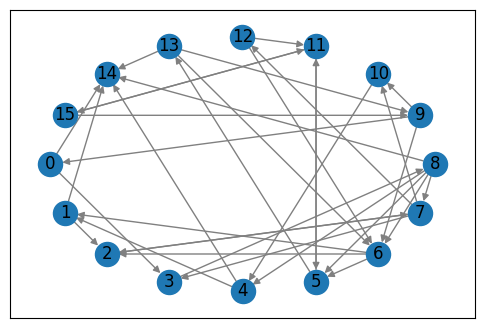

In [9]:
### Create a random graph
g = nx.gnp_random_graph(node_no, edge_p, directed=True)
g_node_no = g.number_of_nodes()
g_edge_no = g.number_of_edges()
unweighted_graph_name = f'digraph_{g_node_no:03d}_{g_edge_no:03d}_v{vers:03d}_unw'

draw_digraph(g, 
    rcParams=(6, 4), save_plot=f'{FIGURES_PATH}/{unweighted_graph_name}.eps')

### Save the graph

In [10]:
### Saving of a graph to a file
g_path = f'{GRAPH_PATH}/{unweighted_graph_name}.json'
save_digraph(g, g_path)
print(f'Saved graph in file: {g_path}')

Saved graph in file: logs/graph/digraph_016_035_v001_unw.json


In [11]:
digraph_details(g)

{'directed': True,
 'multigraph': False,
 'graph': {},
 'nodes': [{'id': 0},
  {'id': 1},
  {'id': 2},
  {'id': 3},
  {'id': 4},
  {'id': 5},
  {'id': 6},
  {'id': 7},
  {'id': 8},
  {'id': 9},
  {'id': 10},
  {'id': 11},
  {'id': 12},
  {'id': 13},
  {'id': 14},
  {'id': 15}],
 'links': [{'source': 0, 'target': 3},
  {'source': 0, 'target': 14},
  {'source': 1, 'target': 2},
  {'source': 1, 'target': 14},
  {'source': 2, 'target': 7},
  {'source': 3, 'target': 8},
  {'source': 4, 'target': 1},
  {'source': 4, 'target': 14},
  {'source': 5, 'target': 11},
  {'source': 5, 'target': 13},
  {'source': 6, 'target': 1},
  {'source': 6, 'target': 2},
  {'source': 6, 'target': 5},
  {'source': 7, 'target': 2},
  {'source': 7, 'target': 3},
  {'source': 7, 'target': 10},
  {'source': 7, 'target': 12},
  {'source': 8, 'target': 4},
  {'source': 8, 'target': 5},
  {'source': 8, 'target': 6},
  {'source': 8, 'target': 7},
  {'source': 8, 'target': 14},
  {'source': 9, 'target': 0},
  {'source': 9

### Generate a QGraph for modeling

***Creation of a quantum digraph includes three stages:***<br/>
- *Converting an undirected graph to an adjacency matrix*
- *Changing all undirected edges to weighted directed edges*
- *Expanding a digraph to a QGraph (quantum digraph) by adding loops to stop vertices*

Note that on measurement, probabilities of navigation from a vertex to all possible targets adds to 1.

### Load the graph

In [12]:
### Select a graph and load it
sel_graph_name = f'digraph_016_035_v001_unw'

In [13]:
### Load the graph
g_path = f'{GRAPH_PATH}/{sel_graph_name}.json'
g_sel = load_digraph(g_path)

g_sel_node_no = g_sel.number_of_nodes()
g_sel_edge_no = g_sel.number_of_edges()
calc_p = g_sel_edge_no / g_sel_node_no**2
print(f'Digraph: name="{sel_graph_name}", node# = {g_sel_node_no}, edge# = {g_sel_edge_no} (calculated p = {np.round(calc_p, 2)})')

Digraph: name="digraph_016_035_v001_unw", node# = 16, edge# = 35 (calculated p = 0.14)


In [14]:
### Define parameters of the graph to be loaded
save_vers = 1 # Change this value to add new graph, then set to zero for test runs
save_graph_name = f'digraph_{g_sel_node_no:03d}_{g_sel_edge_no:03d}_v{save_vers:03d}_wei'
print(f'QGraph will be saved as: name="{save_graph_name}"')

QGraph will be saved as: name="digraph_016_035_v001_wei"


Loaded graph from file: logs/graph/digraph_016_035_v001_unw.json


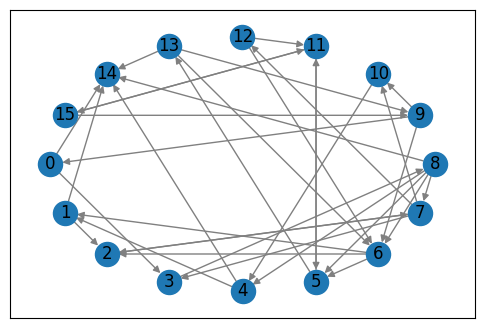

In [15]:
### Draw the selected and loaded graph
draw_digraph(g_sel, rcParams=(6, 4))
print(f'Loaded graph from file: {g_path}')

### Generate a new QGraph

#### Testing the process step by step and observe results

In [16]:
### Convert a graph to an adjacency matrix
import scipy as sci # Not used as yet
adj_sel = nx.adjacency_matrix(g_sel).todense()# adj_sel.toarray()
adj_sel

array([[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0],
       [0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0]])

In [17]:
### Expand the digraph to eliminate stop vertices (out-degree=0)
adj_exp = digraph_adj_expand(adj_sel)
np.around(adj_exp, 3)

array([[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0],
       [0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0]])

In [18]:
### Generate edge probability weights (adding to 1.0)
adj_w = digraph_adj_weigh(adj_exp, method='scale') # rand scale
np.around(adj_w, 3)

array([[0.   , 0.   , 0.   , 0.5  , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.5  , 0.   ],
       [0.   , 0.   , 0.5  , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.5  , 0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 1.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 1.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.5  , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.5  , 0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.5  , 0.   , 0.5  , 0.   , 0.   ],
       [0.   , 0.333, 0.333, 0.   , 0.   , 0.333, 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.25 , 0.25 , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.25 , 0.  

#### Now let us generate a QGraph in a single step

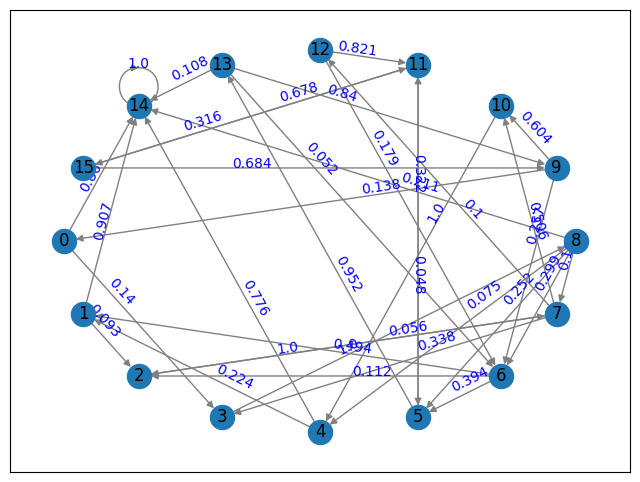

In [20]:
### Test graph generation in one step
g_new = digraph_expanded_and_weighed(g_sel, method='rand') # scale or rand
draw_weighted_digraph(g_new, 'weight', ax=None, 
                      rcParams=(8, 6), save_plot=f'{FIGURES_PATH}/{save_graph_name}.eps')

In [21]:
g_path = f'{GRAPH_PATH}/{save_graph_name}.json'
save_digraph(g_new, g_path)
print(f'Saved graph in file: {g_path}')

Saved graph in file: logs/graph/digraph_016_035_v001_wei.json


In [22]:
digraph_details(g_new)

{'directed': True,
 'multigraph': False,
 'graph': {},
 'nodes': [{'id': 0},
  {'id': 1},
  {'id': 2},
  {'id': 3},
  {'id': 4},
  {'id': 5},
  {'id': 6},
  {'id': 7},
  {'id': 8},
  {'id': 9},
  {'id': 10},
  {'id': 11},
  {'id': 12},
  {'id': 13},
  {'id': 14},
  {'id': 15}],
 'links': [{'weight': 0.13956848615008063, 'source': 0, 'target': 3},
  {'weight': 0.8604315138499194, 'source': 0, 'target': 14},
  {'weight': 0.09334014733818942, 'source': 1, 'target': 2},
  {'weight': 0.9066598526618106, 'source': 1, 'target': 14},
  {'weight': 1.0, 'source': 2, 'target': 7},
  {'weight': 1.0, 'source': 3, 'target': 8},
  {'weight': 0.22414484312237443, 'source': 4, 'target': 1},
  {'weight': 0.7758551568776255, 'source': 4, 'target': 14},
  {'weight': 0.04796872494062756, 'source': 5, 'target': 11},
  {'weight': 0.9520312750593725, 'source': 5, 'target': 13},
  {'weight': 0.494327688367546, 'source': 6, 'target': 1},
  {'weight': 0.11169316550726907, 'source': 6, 'target': 2},
  {'weight': 

## System

In [23]:
!pip list | grep -e torch -e PennyLane -e networkx

networkx                  3.3
PennyLane                 0.36.0
PennyLane_Lightning       0.36.0
PennyLane_Lightning_GPU   0.36.0
PennyLane-Rigetti         0.36.0
torch                     2.3.1+cu121
torch_geometric           2.5.3
torchaudio                2.3.1+cu121
torchsummary              1.5.1
torchvision               0.18.1+cu121
